In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import shutil


In [68]:
data = pd.read_csv ('../data_org/train.csv')

In [69]:
data.insert(loc = 0, column = 'row_id', value = data.index)

In [70]:
asset_details = pd.read_csv('../data_org/asset_details.csv')

In [71]:
if os.path.isdir('metrics'):
    shutil.rmtree('metrics')
    
os.mkdir('metrics')
    

In [72]:
if os.path.isdir('charts'):
    shutil.rmtree('charts')
    
os.mkdir('charts')

In [73]:
if os.path.isdir('submission'):
    shutil.rmtree('submission')
    
os.mkdir('submission')

In [74]:
# df_final = pd.DataFrame(columns = ['group_num', 'row_id', 'Target'])
df_final = pd.DataFrame()

   group_num    row_id    Target
0          0  18832181 -0.000141
1          0  18832195 -0.000066
2          0  18832209 -0.000121
3          0  18832223 -0.000125
4          0  18832237 -0.000075

   group_num    row_id    Target
0          1  18760935  0.000033
1          1  18760949  0.000022
2          1  18760963  0.000024
3          1  18760977  0.000029
4          1  18760991  0.000018

   group_num    row_id    Target
0          2  18781232  0.000025
1          2  18781246  0.000002
2          2  18781260  0.000007
3          2  18781274  0.000076
4          2  18781288  0.000057

   group_num    row_id    Target
0          3  19272727 -0.000060
1          3  19272741 -0.000115
2          3  19272755 -0.000037
3          3  19272769 -0.000051
4          3  19272783  0.000150

   group_num    row_id    Target
0          4  21404220 -0.000433
1          4  21404234 -0.000448
2          4  21404248 -0.000444
3          4  21404262 -0.000447
4          4  21404276 -0.000493

   gr

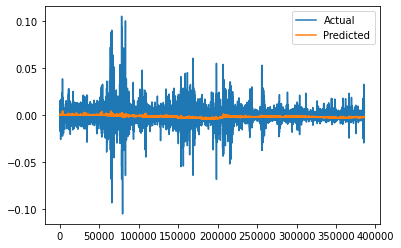

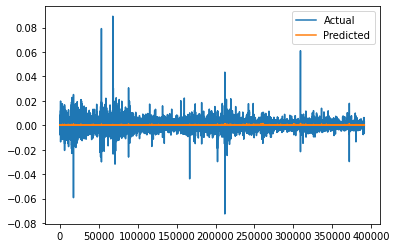

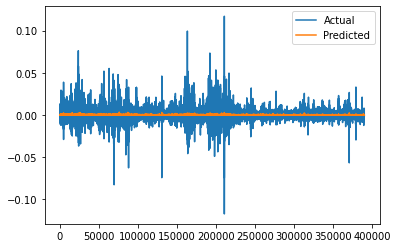

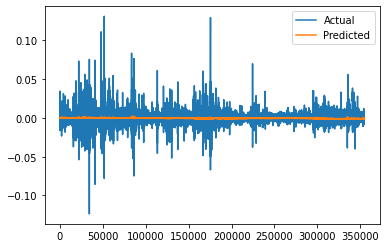

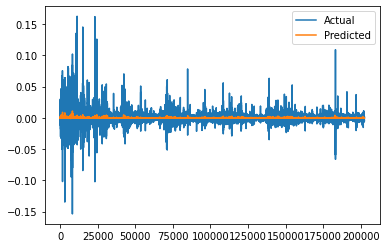

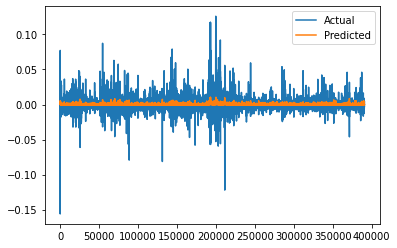

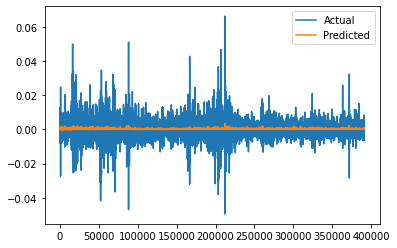

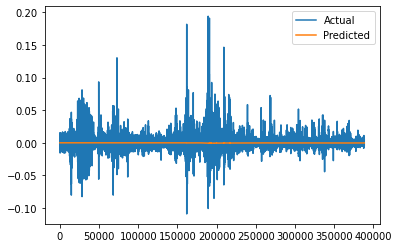

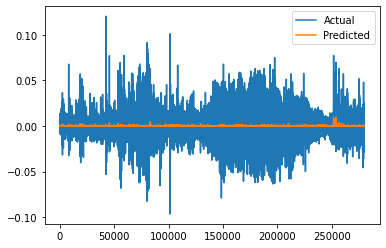

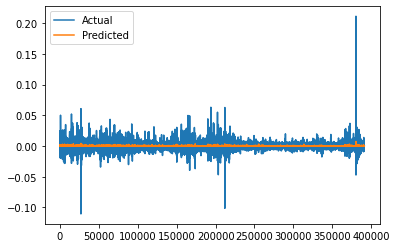

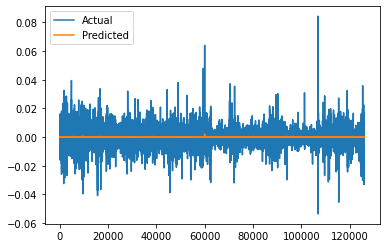

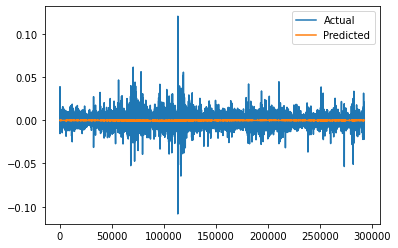

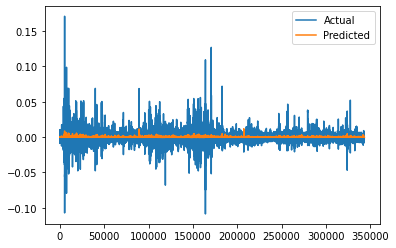

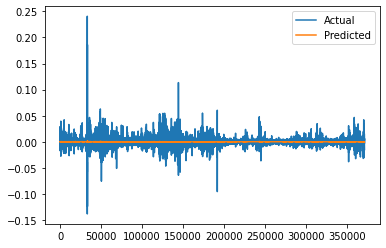

In [75]:
for each in asset_details['Asset_ID']:
    
    asset_name = asset_details['Asset_Name'].loc[asset_details['Asset_ID'] == each].values
    asset_name = asset_name[0].replace(' ', '_' )
    
    asset_df = pd.DataFrame(data.loc[data['Asset_ID'] == each ])
    asset_df.dropna(inplace=True)

    
    div_num = math.ceil(asset_df.shape[0] * .8)
    
    train = asset_df.iloc[0:div_num]
    test = asset_df.iloc[div_num:-1]
    
    x_train = train[['Close', 'Volume']].values
    y_train = train['Target'].values
    
    x_test = test[['Close', 'Volume']].values
    y_test = test['Target'].values
    
    regressor = LinearRegression()
    
    regressor.fit(x_train, y_train)
    
    predicted = regressor.predict(x_test)
    
    df_plot = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})
    df_part = pd.DataFrame({'group_num':test['Asset_ID'].values, 'row_id':test['row_id'].values, 'Target':predicted.flatten()})
    
    print(df_part.head(5))
    print()
    
    df_final = df_final.append(df_part)
    
    f = open(f"metrics/{asset_name}", "a")
    
    f.write(f'Regressor Ceof: {regressor.coef_}\n')
    f.write(f'Regressor Intercept: {regressor.intercept_}\n')
    f.write(f'Mean Absolute Error: {str(metrics.mean_absolute_error(y_test, predicted))}\n')
    f.write(f'Mean Squared Error: {str(metrics.mean_squared_error(y_test, predicted))}\n')
    f.write(f'Root Mean Squared Error: {str(math.sqrt(metrics.mean_squared_error(y_test, predicted)))}\n')
    
    f.close()
    
    df_plot.plot(kind='line')
    plt.savefig(f'charts/{asset_name}.png',transparent = True,facecolor ="w",)


In [78]:
df_final

,group_num,row_id,Target
0,0,18832181,-0.000141
1,0,18832195,-0.000066
2,0,18832209,-0.000121
3,0,18832223,-0.000125
4,0,18832237,-0.000075
...,...,...,...
370703,13,24236509,-0.000093
370704,13,24236523,-0.000087
370705,13,24236537,-0.000104
370706,13,24236551,-0.000103


In [77]:
df_final.to_csv('submission/lin_reg_sub.csv')